# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities? 
6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?
8. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split

cars = pd.read_csv("./data/cars_hw.csv")
cars.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [95]:
cars.dtypes

Unnamed: 0            int64
Make                 object
Make_Year             int64
Color                object
Body_Type            object
Mileage_Run           int64
No_of_Owners         object
Seating_Capacity      int64
Fuel_Type            object
Transmission         object
Transmission_Type    object
Price                 int64
dtype: object

<Axes: >

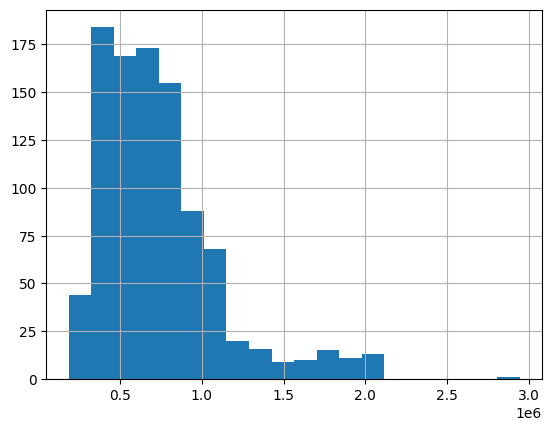

In [97]:
cars['Price'].hist(bins=20) 

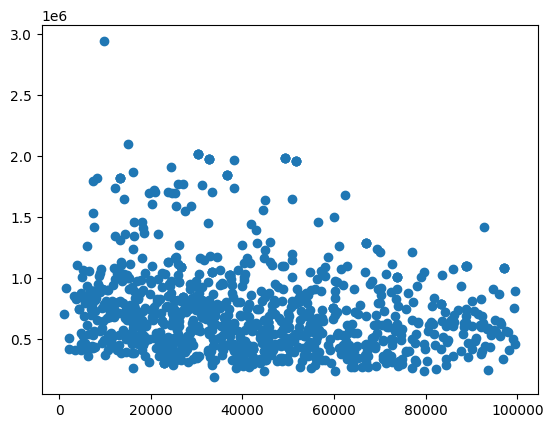

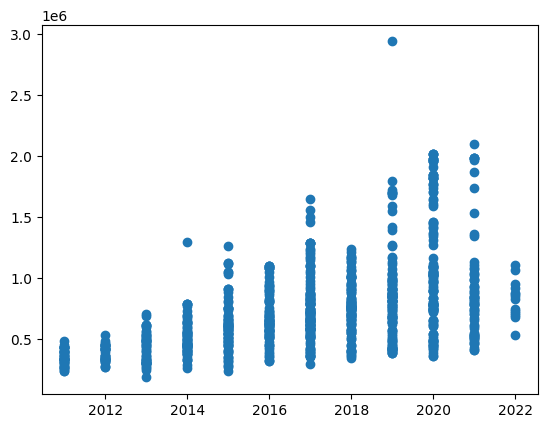

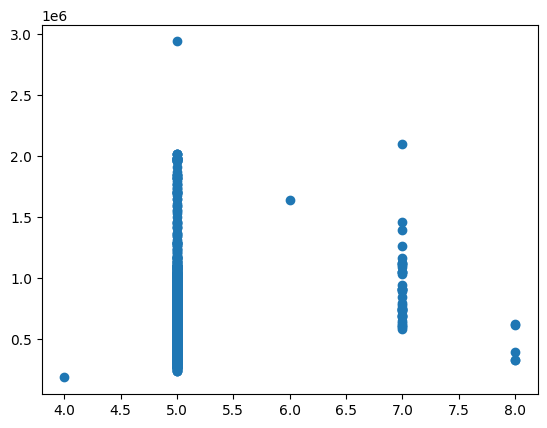

In [ ]:
#Scatterplot visualizations to see relationships between Numeric variables
plt.scatter(x=cars["Mileage_Run"], y=cars["Price"])
plt.show() #some relationship visible 

plt.scatter(x=cars["Make_Year"], y=cars["Price"])
plt.show() #Seems to be relationship between price and age 

plt.scatter(x=cars["Seating_Capacity"], y=cars["Price"])
plt.show() #No visible linear relationship

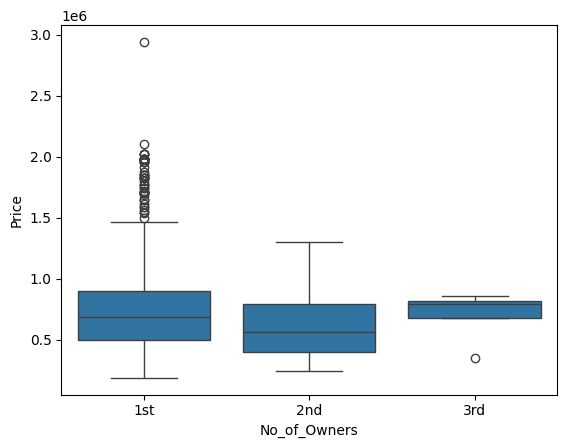

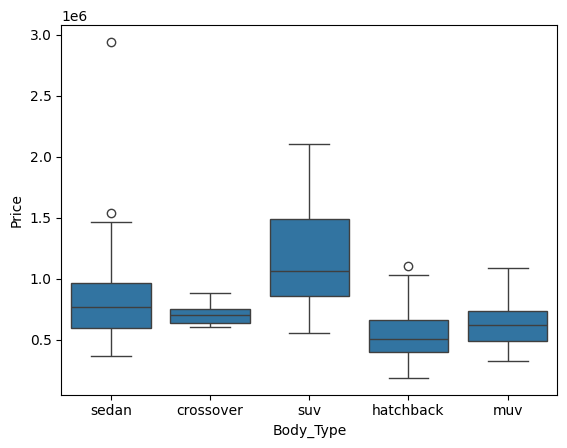

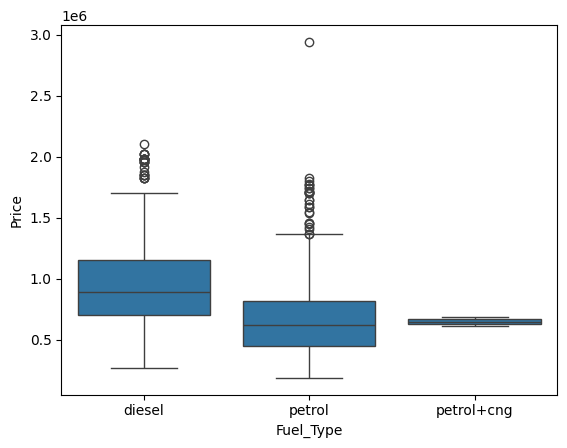

In [ ]:
#Boxplot visualization to find significant categorical variables 
sns.boxplot(data=cars, y="Price", x="No_of_Owners")
plt.show() #not significant differences between Average prices

sns.boxplot(data=cars, y="Price", x="Body_Type")
plt.show() #Seeming differences 

sns.boxplot(data=cars, y="Price", x="Fuel_Type")
plt.show() #not significant differences between fuel types

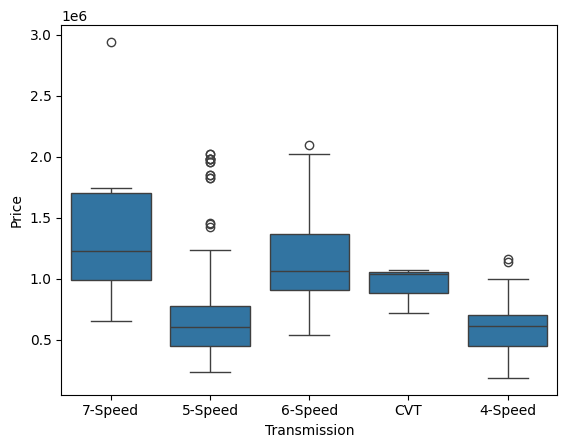

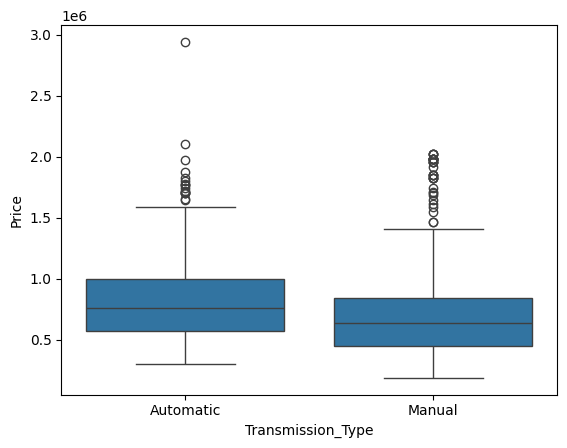

In [ ]:
sns.boxplot(data=cars, y="Price", x="Transmission")
plt.show() #significant differences between type of transmission

sns.boxplot(data=cars, y="Price", x="Transmission_Type")
plt.show() #not significant differences between transmission type

In [ ]:
print(cars["Make"].unique())
print(cars["Color"].unique()) #Too many options to one hot encode, do not include 

['Volkswagen' 'Hyundai' 'Honda' 'Renault' 'Tata' 'Chevrolet'
 'Maruti Suzuki' 'Toyota' 'Mahindra' 'Ford' 'Nissan' 'Jeep' 'MG Motors'
 'Kia' 'Skoda' 'Datsun']
['silver' 'red' 'white' 'bronze' 'orange' 'grey' 'blue' 'yellow' 'beige'
 'brown' 'golden' 'black' 'maroon' 'purple' 'green']


In [120]:
#Create matrix of significant variables 
y=cars["Price"]
X = cars.loc[:, ['Mileage_Run', 'Make_Year', 'Body_Type', 'Transmission']]

In [121]:
#One hot encode categorical variables that were found to be significant 
X=pd.get_dummies(X, columns=["Body_Type", "Transmission"])
X.head()

,Mileage_Run,Make_Year,Body_Type_crossover,Body_Type_hatchback,Body_Type_muv,Body_Type_sedan,Body_Type_suv,Transmission_4-Speed,Transmission_5-Speed,Transmission_6-Speed,Transmission_7-Speed,Transmission_CVT
0,44611,2017,False,False,False,True,False,False,False,False,True,False
1,20305,2016,True,False,False,False,False,False,True,False,False,False
2,29540,2019,False,False,False,False,True,False,True,False,False,False
3,35680,2017,False,True,False,False,False,False,True,False,False,False
4,25126,2017,False,True,False,False,False,False,True,False,False,False


In [129]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=100)

In [139]:
#Create first linear model
reg = LinearRegression().fit(X_train, y_train)
print(reg.intercept_) 
print(reg.coef_) 
print("Training R^2" , reg.score(X_train, y_train)) #R squared measure not too high 
print("Test R^2", reg.score(X_test, y_test))


-88507112.14702016
[-5.15274791e-01  4.43119887e+04 -4.58592454e+04 -1.56351228e+05
 -1.13457836e+05  6.53628720e+04  2.50305437e+05 -1.81015433e+05
 -1.49864268e+05  1.00803192e+05  3.33629856e+05 -1.03553347e+05]
Training R^2 0.6759056589711094
Test R^2 0.6537710253223283


In [ ]:
#Try new regression without categorical variables
Xcat=X_train.loc[:, ['Mileage_Run', 'Make_Year']]
regCat = LinearRegression().fit(Xcat, y_train)
print(regCat.score(Xcat, y_train)) #Very low R-squared measure 

0.3024553353873898


In [140]:
#Retry split with more variables
X2 = cars.loc[:, ['Make_Year', 'Body_Type', 'Make', "Color", "Transmission"]]
X2=pd.get_dummies(X2, columns=["Body_Type", "Make", "Color", "Transmission"])
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y, test_size=.2, random_state=100)
reg2 = LinearRegression().fit(X_train2, y_train2)
print("Training R^2" , reg2.score(X_train2, y_train2))  #Best score of 82.34
print("Test R^2", reg2.score(X_test2, y_test2))

Training R^2 0.8233572992286939
Test R^2 0.8346158311424707
